In [1]:
# Import pakcages
import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plotting


In [2]:
def readData(p):
    return open(p, "r").readlines()

In [6]:
import glob

# glob through the directories using the file's extension
def get_all(p):
    return glob.glob(p)

In [7]:
# test the custom code
get_all('data/*data')

['data/processed.cleveland.data',
 'data/processed.switzerland.data',
 'data/processed.hungarian.data',
 'data/processed.va.data']

In [8]:
# read files into memory
readmefile = [ readData(d) for d in get_all('data/*data') ]
readmefile

[['63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0\n',
  '67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2\n',
  '67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1\n',
  '37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0\n',
  '41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0\n',
  '56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0\n',
  '62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3\n',
  '57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0\n',
  '63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2\n',
  '53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1\n',
  '57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0\n',
  '56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0\n',
  '56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2\n',
  '44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0\n',
  '52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.

In [9]:
# get length of the file
len(readmefile)

4

### Get the Data

In [10]:
def getForPandas(d):
    ''' a custom function to prepare the read file into pandas. '''
    rawdata1 = [_.split(',') for _ in d]
    rawdata2 = []

    for line in rawdata1:
        line[-1] = line[-1].replace("\n","")
        rawdata2.append(line)
    
    return rawdata2

In [11]:
# test the function 
pd.DataFrame(getForPandas(readmefile[0]))

0    1    2      3      4    5    6      7    8    9    10   11   12 13
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0  0
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0  2
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0  1
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0  0
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0  0
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ... ..
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0  1
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0  2
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0  3
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0  1
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    ?  3.0  0

[303 rows x 14 columns]

In [12]:
# check the length of each of the data read to pandas
c = 0
for i in readmefile:
    c += len(pd.DataFrame(getForPandas(i)))
    print(len(pd.DataFrame(getForPandas(i))))

303
123
294
200


In [15]:
# set column names
columns = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [16]:
df = []

for i in readmefile:
    df.append(pd.DataFrame(getForPandas(i), columns=columns))

df = pd.concat(df)

df.head()

age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0  63.0  1.0  1.0    145.0  233.0  1.0     2.0   150.0   0.0     2.3   3.0   
1  67.0  1.0  4.0    160.0  286.0  0.0     2.0   108.0   1.0     1.5   2.0   
2  67.0  1.0  4.0    120.0  229.0  0.0     2.0   129.0   1.0     2.6   2.0   
3  37.0  1.0  3.0    130.0  250.0  0.0     0.0   187.0   0.0     3.5   3.0   
4  41.0  0.0  2.0    130.0  204.0  0.0     2.0   172.0   0.0     1.4   1.0   

    ca thal num  
0  0.0  6.0   0  
1  3.0  3.0   2  
2  2.0  7.0   1  
3  0.0  3.0   0  
4  0.0  3.0   0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       920 non-null    object
 1   sex       920 non-null    object
 2   cp        920 non-null    object
 3   trestbps  920 non-null    object
 4   chol      920 non-null    object
 5   fbs       920 non-null    object
 6   restecg   920 non-null    object
 7   thalach   920 non-null    object
 8   exang     920 non-null    object
 9   oldpeak   920 non-null    object
 10  slope     920 non-null    object
 11  ca        920 non-null    object
 12  thal      920 non-null    object
 13  num       920 non-null    object
dtypes: object(14)
memory usage: 107.8+ KB


## Clean the data

In [18]:
# convert datatypes to it respective type
convert_to_int = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'oldpeak','ca', 'thal', 'num']

for c in convert_to_int:
    df[c].replace({"?": ""}, inplace=True)
    df[c] = pd.to_numeric(df[c])
df.dtypes    

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [20]:
# drop nan's in each row
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 28
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  num       299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 35.0 KB


With the target or label (num) we need to set to 0 or 1. From the dataset info, the num value should be set either 0 or 1 depending on the diameter narrowing. So taking the mean of the label, we set 2 as the threshold. Any number less than 2 will be set as 0 else 1.

0 is for no heart disease or normal patient, 1 is for a patient who has a heart disease.

In [22]:
# set binary label
df['num'] = df['num'].apply(lambda x: 1 if x >= 1 else 0)

# Visualization

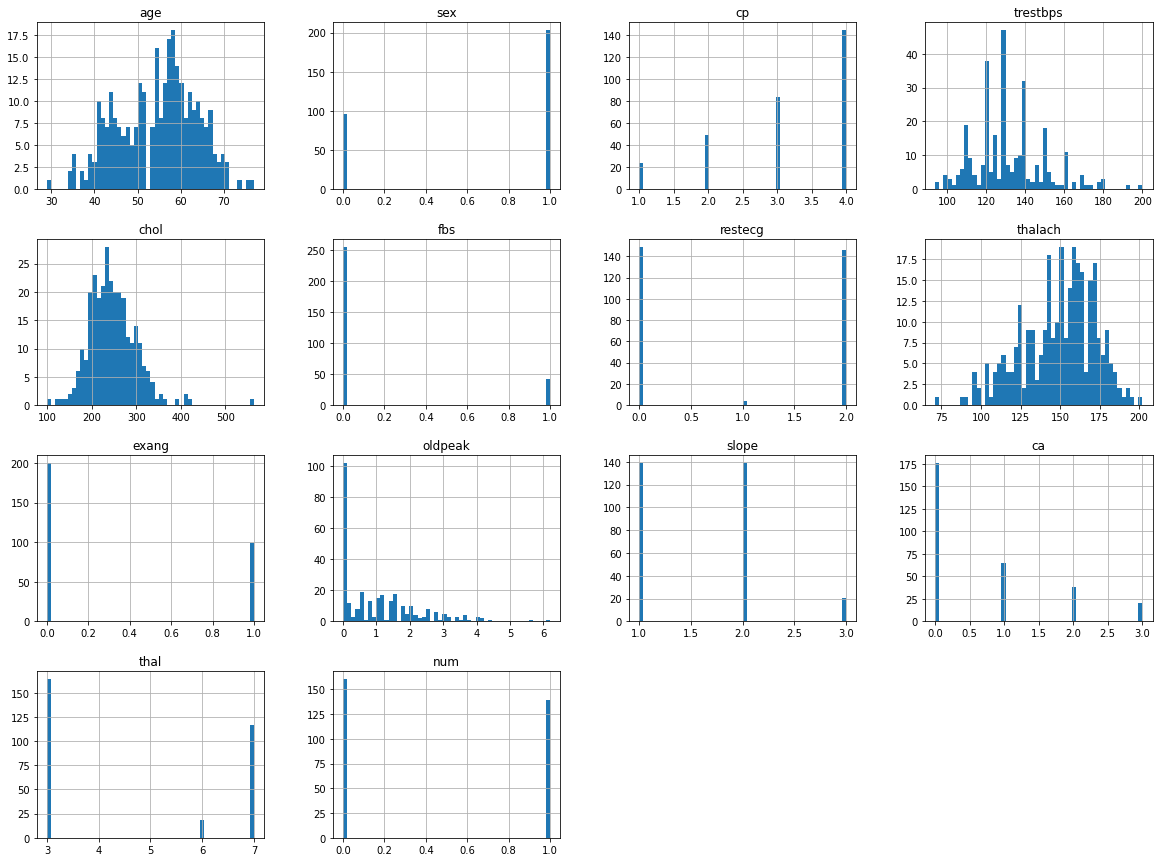

In [23]:
df.hist(bins=50, figsize=(20,15))
plt.show()




#### correlation

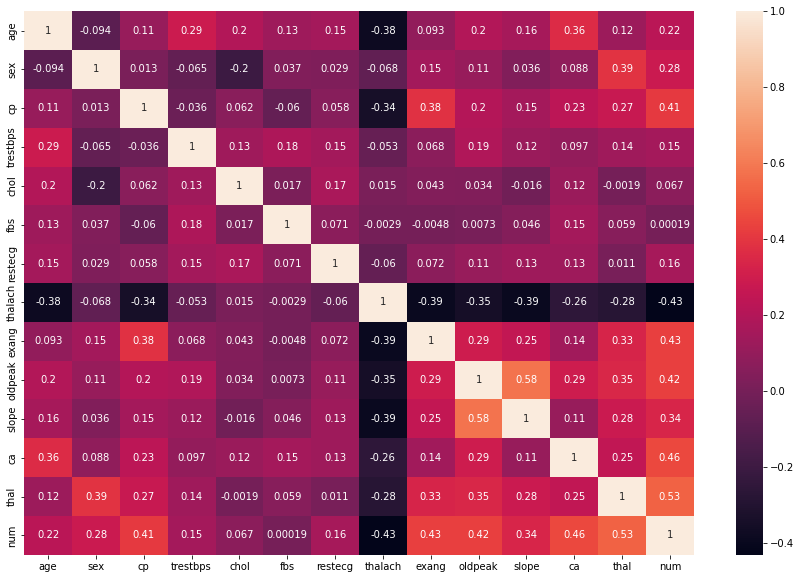

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [25]:
corr_mat= df.corr()

In [26]:
corr_mat['num'].sort_values(ascending=False)

num         1.000000
thal        0.530603
ca          0.455398
exang       0.427123
oldpeak     0.424947
cp          0.412597
slope       0.335926
sex         0.281912
age         0.223498
restecg     0.157941
trestbps    0.153849
chol        0.067350
fbs         0.000192
thalach    -0.430108
Name: num, dtype: float64

### 2

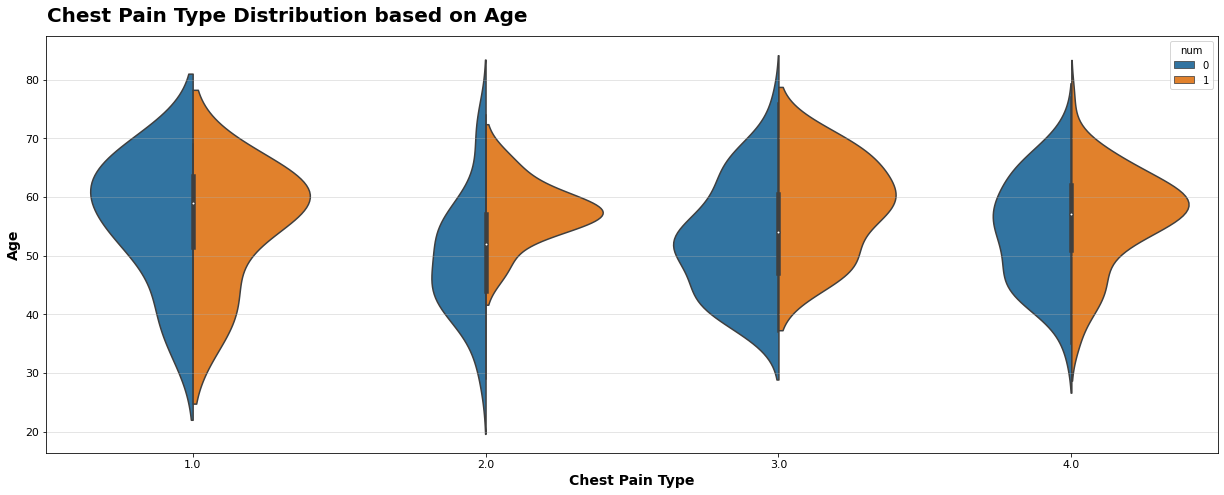

In [27]:
# -- Violin Plot Size & Titles Settings ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.suptitle('Chest Pain Type Distribution based on Age', fontweight='heavy', 
             x=0.028, y=0.98, ha='left', fontsize='20', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Violin Plot based on Type ---
sns.violinplot(x='cp', y='age', hue='num', data=df, ax=ax, 
               boxprops=dict(alpha=0.9), linewidth=1.5, 
               split=True)

# --- Violin Plot Legend & Labels Settings ---
# plt.legend(title='$\\bf{Target}$', fontsize='10', title_fontsize='12', frameon=True,
#            loc='upper right')
plt.xlabel('Chest Pain Type', fontweight='bold', fontsize='14', 
           fontfamily='sans-serif')
plt.ylabel('Age', fontweight='bold', fontsize='14'  )
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')
plt.grid(axis='y', alpha=0.4)
plt.show();

- It can be seen that the lowest patient age is in chest pain types 1 and 3. In addition, the age distribution of patients who do not have heart disease is mostly around 60 years old. It can also be\nseen that patients who have heart disease are younger than those who do not have heart disease.', 
         

### based on gender

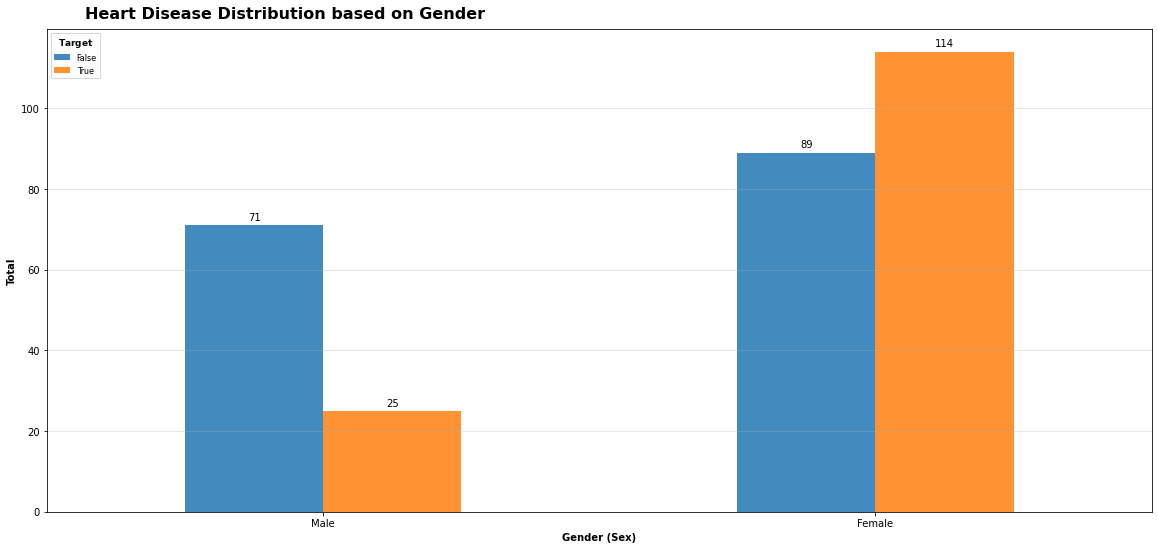

In [28]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.num).plot(kind='bar', figsize=(16, 8), 
                                         alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=1, ha='left', fontsize='16', fontfamily='sans-serif') 

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);


- Females are more likely than males to suffer from heart disease. Males have a more balanced distribution than females, who have nearly the same distribution.
       

### age

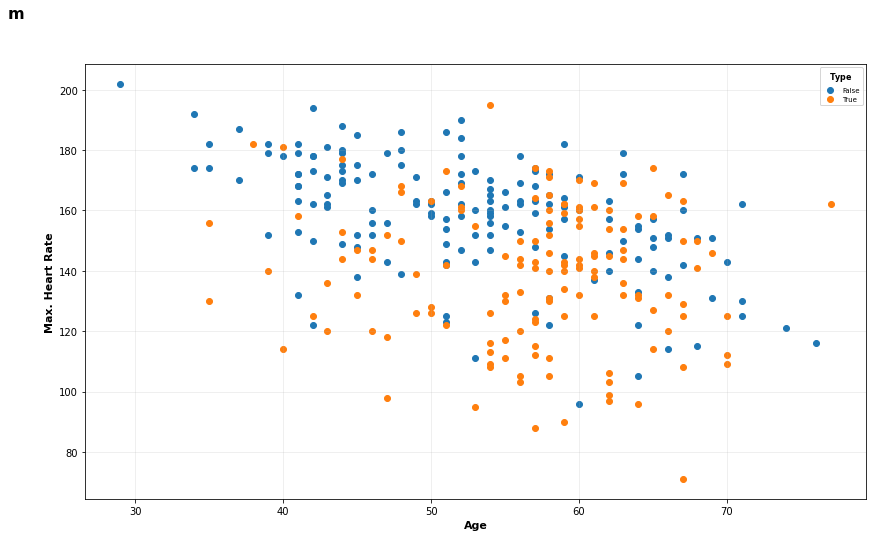

In [29]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(14, 8))
plt.suptitle('m', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
              )

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.num==0], y=df.thalach[(df.num==0)])
plt.scatter(x=df.age[df.num==1], y=df.thalach[(df.num==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

Based on age, patients with and without heart diseases mostly between 54-68 years old. Patients with heart diseases tend to have high heart rate compared to patients with no heart diseases.', 
          

# preparation

In [30]:
# set temporal data
df_ = df.copy()

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(df_, df_["num"]):
    strat_train_set = df_.iloc[train_index]
    strat_test_set = df_.iloc[test_index]


In [32]:
x_train = strat_train_set.drop(['num'], axis=1)
y_train = strat_train_set["num"].copy()

x_test = strat_test_set.drop("num", axis=1)
y_test = strat_test_set["num"].copy()

feature scaling

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# split dataset
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(df_, df_["num"]):
    strat_train_set = df_.iloc[train_index]
    strat_test_set = df_.iloc[test_index]

# share to train and test
x_train = strat_train_set.drop(['num'], axis=1)
y_train = strat_train_set["num"].copy()

x_test = strat_test_set.drop("num", axis=1)
y_test = strat_test_set["num"].copy()

# use pipeline to preprocess the value
num_pipeline = Pipeline([
            ('MinMax_scaler',  MinMaxScaler())
])
minmaxscaler =  MinMaxScaler()

# scale
train_prepared = minmaxscaler.fit_transform(x_train)
test_prepared = minmaxscaler.fit_transform(x_test)


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
#             ('imputer', SimpleImputer(strategy="median")),
            ('MinMax_scaler',  MinMaxScaler())
        ])
 
    
# train_prepared = num_pipeline.fit_transform(x_train)
# test_prepared = num_pipeline.fit_transform(x_test)

minmaxscaler =  MinMaxScaler()

train_prepared = minmaxscaler.fit_transform(x_train)
test_prepared = minmaxscaler.fit_transform(x_test)



train_prepared[0:2]


array([[0.58139535, 1.        , 1.        , 0.71698113, 0.48706897,
        0.        , 1.        , 0.48598131, 1.        , 0.5483871 ,
        1.        , 0.        , 1.        ],
       [0.48837209, 1.        , 0.33333333, 0.33962264, 0.34913793,
        0.        , 0.        , 0.62616822, 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

# Models

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

evaluation functions

#### Confusion Matrix

In compared to the real labels, the confusion matrix reveals the corrected and incorrect predictions. It demonstrates the model's ability to forecast or differentiate the classes accurately.

    True Positive – Positive class was successfully predicted by the model to be a positive class.
    False Positive – The model predicted a positive class when it should have been a negative class.
    False Negative – The model expected the positive class to be the negative class.
    True Negative – The model properly predicted the negative class to be the negative class.

In [36]:

from sklearn.metrics import confusion_matrix, \
    ConfusionMatrixDisplay,  classification_report, f1_score, roc_auc_score, roc_curve
    


In [37]:
def computeROCAUC(y_test, y_pred, title=''):
    ROC_AUC = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title(f"ROC Curve for {title}, ROC_AUC Score: {ROC_AUC:3.4%}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    
# CUSTOM CONFUSION MATRIX PLOT
def plot_confusion(y_test, clf_pred, clf, title=''):
    cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
    cmp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
    
    # compute the f1score
    f1score = f1_score(y_test, clf_pred)
    
    
    sns.heatmap(cm, annot=True,cmap='Blues',annot_kws={"size": 30})
    plt.title(f"Confusion Matrix for {title} , F1 Score: {f1score:3.4%}")#.format(f1score))
    plt.show()

    print('True Positive:\t{}'.format(cm[0,0]))
    print('True Negative:\t{}'.format(cm[0,1]))
    print('False Positive:\t{}'.format(cm[1,0]))
    print('False Negative:\t{}'.format(cm[1,1]))



In [38]:

def run_model(model, X_train, y_train, X_test, y_test, title):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Report:\n{}'.format(classification_report(y_test, y_pred)))
    print('Score: {}'.format(model.score(X_test, y_test)))
    print("\nNumber of mislabeled points out of a total %d points : %d" % (X_test.shape[0],
                                                                       (y_test != y_pred).sum()))
    print()
    
#     train_acc = accuracy_score(y_train, y_pred)
#     train_acc = accuracy_score(y_test, y_pred)
    print('Train Score: {}'.format(accuracy_score(y_train, model.predict(X_train))))
    print('Test Score: {}'.format(accuracy_score(y_test, y_pred)))
    print()
    
    acc = model.score(X_test, y_test)
    
    print()
    print()
    
    # --- Confusion Matrix ---
    plot_confusion(y_test, y_pred, model, title=title)

    print()
    
    print('\n\033[1m'+'.: ROC AUC'+'\033[0m')
    print('*' * 26)
    
    # --- ROC AUC ---
    computeROCAUC(y_test, y_pred, title=title)
    
    return acc





#### K-neighbors


The k-nearest neighbors (KNN) algorithm is a data classification method for predicting whether a data point will belong to one of two groups. It doesn't start building a model until the dataset is queried. KNN is hence suitable for data mining.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.92      0.79      0.85        28

    accuracy                           0.87        60
   macro avg       0.88      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Score: 0.8666666666666667

Number of mislabeled points out of a total 60 points : 8

Train Score: 0.8410041841004184
Test Score: 0.8666666666666667





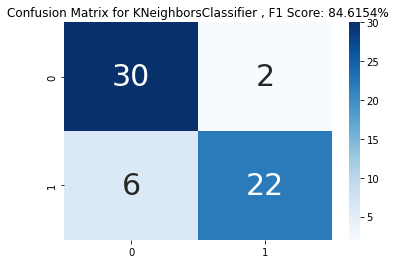

True Positive:	30
True Negative:	2
False Positive:	6
False Negative:	22


.: ROC AUC
**************************


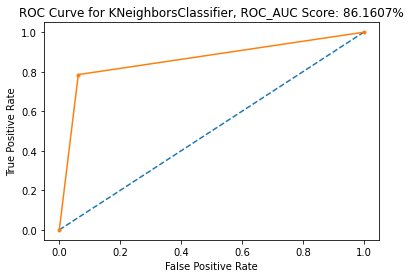

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_acc = run_model(knn, X_train=train_prepared, y_train=y_train, 
          X_test=test_prepared, y_test=y_test, title='KNeighborsClassifier')


The confusion matrix results provided show that the classifier being evaluated is not performing very well. Even though the true positive (TP) count is relatively high at 30, the false negative (FN) count is also high at 22, indicating that a significant number of positive examples are being misclassified as negative. The True Negative (TN) count is also low at 2, indicating that a significant number of negative examples are also being misclassified.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



#### SVC

Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Score: 0.8333333333333334

Number of mislabeled points out of a total 60 points : 10

Train Score: 0.8535564853556485
Test Score: 0.8333333333333334





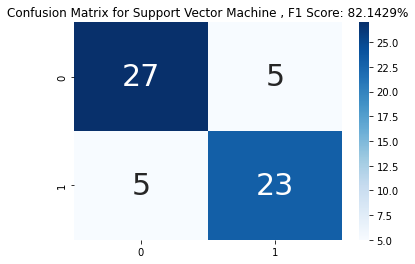

True Positive:	27
True Negative:	5
False Positive:	5
False Negative:	23


.: ROC AUC
**************************


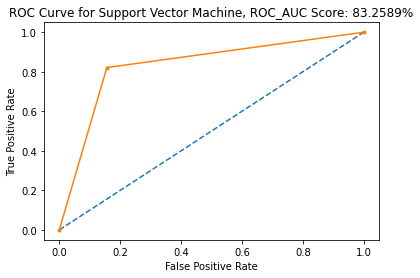

In [42]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=4.0, random_state=0)
svc_acc = run_model(svc, X_train=train_prepared, y_train=y_train,
          X_test=test_prepared, y_test=y_test, title='Support Vector Machine')


From the results, it can be seen that the SVM classifier has 27 true positives, which means that it correctly identified 27 examples as belonging to the positive class. However, it also has 23 false negatives, which means that it incorrectly classified 23 examples that actually belong to the positive class as belonging to the negative class. This can be an indication that the SVM is not very good at identifying positive examples.

On the other hand, the classifier has five true negatives, which means that it correctly identified five examples as belonging to the negative class. However, it also has 5 false positives, which means that it incorrectly classified 5 examples that actually belong to the negative class as belonging to the positive class.

#### Decision Tree Classifier

Report:
              precision    recall  f1-score   support

           0       0.61      0.72      0.66        32
           1       0.59      0.46      0.52        28

    accuracy                           0.60        60
   macro avg       0.60      0.59      0.59        60
weighted avg       0.60      0.60      0.59        60

Score: 0.6

Number of mislabeled points out of a total 60 points : 24

Train Score: 1.0
Test Score: 0.6





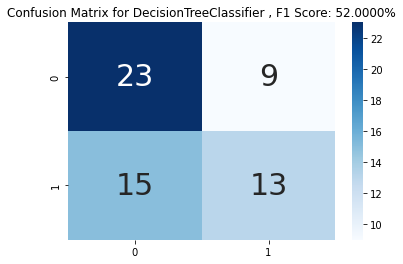

True Positive:	23
True Negative:	9
False Positive:	15
False Negative:	13


.: ROC AUC
**************************


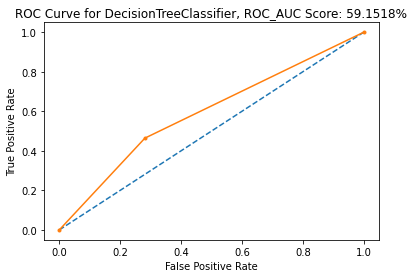

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc_acc = run_model(dtc, X_train=train_prepared, y_train=y_train,
          X_test=test_prepared, y_test=y_test, title='DecisionTreeClassifier')


From the results, it can be seen that the decision tree classifier has 23 true positives, which means that it correctly identified 23 examples as belonging to the positive class. However, it also has 13 false negatives, which means that it incorrectly classified 13 examples that actually belong to the positive class as belonging to the negative class. This can be an indication that the decision tree is not very good at identifying positive examples.

Furthermore, the classifier has nine true negatives, which means that it correctly identified nine examples as belonging to the negative class. However, it also has 15 false positives, which means that it incorrectly classified 15 examples that actually belong to the negative class as belonging to the positive class.`m

In [44]:
from sklearn.ensemble import RandomForestClassifier

#### Random Forest Classifier

Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.78      0.75      0.76        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

Score: 0.7833333333333333

Number of mislabeled points out of a total 60 points : 13

Train Score: 1.0
Test Score: 0.7833333333333333





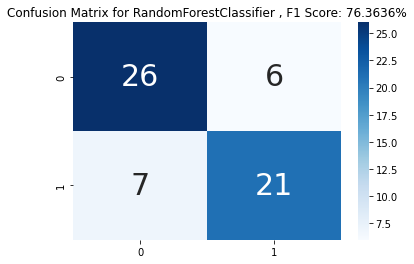

True Positive:	26
True Negative:	6
False Positive:	7
False Negative:	21


.: ROC AUC
**************************


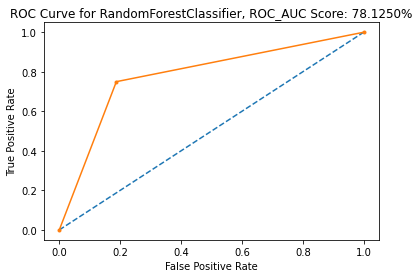

In [45]:
rfc = RandomForestClassifier(random_state=0)
rfc_acc = run_model(rfc, X_train=train_prepared, y_train=y_train,
          X_test=test_prepared, y_test=y_test, title='RandomForestClassifier')


KNeighbor outperformed all the models.

In [49]:
def make_predictions(model, X_train, y_train, X_test):
    
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [62]:
def make_roc(X_train, y_train, X_test, models=[knn,svc,dtc,rfc]):
    
    
    
    
    knn_false_positive_rate, knn_true_positive_rate, knn_threshold = roc_curve(y_test, make_predictions(models[0], X_train, y_train, X_test))
    
    svc_false_positive_rate, svc_true_positive_rate,svc_threshold = roc_curve(y_test, make_predictions(models[1], X_train, y_train, X_test))
    
    dtc_false_positive_rate, dtc_true_positive_rate,dtc_threshold = roc_curve(y_test, make_predictions(models[2], X_train, y_train, X_test))
    
    
    rfc_false_positive_rate,  rfc_true_positive_rate, rfc_threshold = roc_curve(y_test, make_predictions(models[3], X_train, y_train, X_test))
    
    print('roc results')
    print('false_positive_rate','\ttrue_positive_rate','\t\tthreshold\n')
    print(knn_false_positive_rate,knn_true_positive_rate, knn_threshold,'K-Nearest Neighbor')
    print(svc_false_positive_rate,svc_true_positive_rate, svc_threshold,'Support Vector Classifier')
    print(dtc_false_positive_rate,dtc_true_positive_rate, dtc_threshold,'Desion Tree')
    print(rfc_false_positive_rate,rfc_true_positive_rate,rfc_threshold,'Random Forest')
    print()

    plt.figure(figsize=(10,5))
    plt.title('Reciver Operating Characterstic Curve')
    plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
    plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
    plt.plot(dtc_false_positive_rate,dtc_true_positive_rate,label='Desion Tree')
    plt.plot(rfc_false_positive_rate,rfc_true_positive_rate,label='Random Forest')
    plt.plot([0,1],ls='--')
    plt.plot([0,0],[1,0],c='.5')
    plt.plot([1,1],c='.5')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.legend()
    plt.show()


    

roc results
false_positive_rate 	true_positive_rate 		threshold

[0.     0.0625 1.    ] [0.         0.78571429 1.        ] [2 1 0] K-Nearest Neighbor
[0.      0.15625 1.     ] [0.         0.82142857 1.        ] [2 1 0] Support Vector Classifier
[0.      0.28125 1.     ] [0.         0.46428571 1.        ] [2 1 0] Desion Tree
[0.     0.1875 1.    ] [0.   0.75 1.  ] [2 1 0] Random Forest



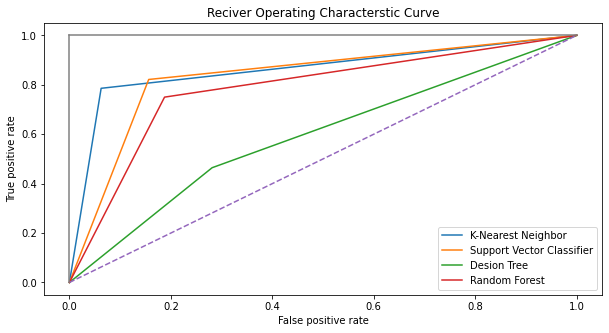

In [63]:
make_roc( X_train=train_prepared, y_train=y_train,
          X_test=test_prepared)

The ROC findings shown in Figure 17 show that the K-Nearest Neighbor and Support Vector Classifier work well, with TPR and FPR both being near to 1. This indicates that these classifiers have a low rate of false positives and false negatives (missing real positive cases) (misclassifying negative cases as positive).


However, the performance of decision tree and random forest classifiers is less impressive. The decision tree has a TPR of 0.46428571 and an FPR of 0.28125, meaning that it frequently misclassifies positive situations as negative and produces many false positives. Similar to K-Nearest Neighbor and Support Vector Classifier, Random Forest has a TPR of 0.75 and a FPR of 0.1875—both of which are inferior to those algorithms.

Therefore, based on the ROC results provided, it seems that K-Nearest Neighbor and Support Vector Classifier have better performance than Decision Tree and Random Forest.

In [64]:
models_acc=[knn_acc, svc_acc, dtc_acc, rfc_acc]



In [65]:
models_acc

[0.8666666666666667, 0.8333333333333334, 0.6, 0.7833333333333333]

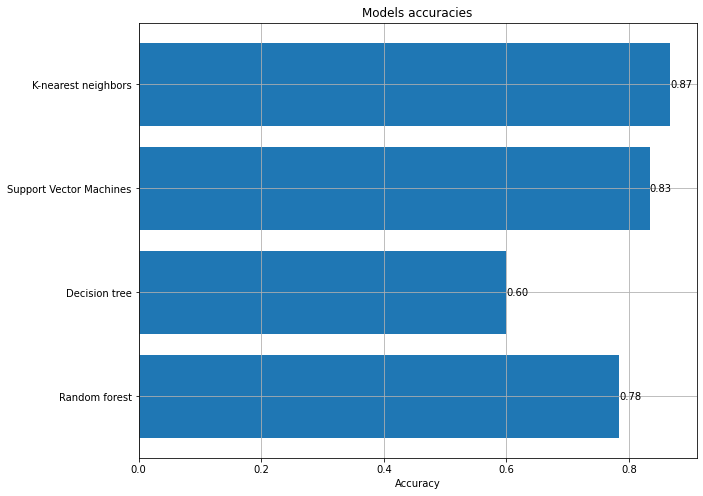

In [69]:

# Example data
people = ('K-nearest neighbors','Support Vector Machines', 'Decision tree', 'Random forest')
y_pos = np.arange(len(people))
performance =  models_acc

fig, ax = plt.subplots(figsize=(10,8))

hbars = ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('Models accuracies')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')

plt.grid()

plt.show()

From the accuracy plot provided, it can be seen that the "K-nearest neighbors" and "Support Vector Machines" models have the highest accuracy scores of 0.87 and 0.83, respectively. This means that these models are making correct predictions at a rate of 86.67% and 83.33%, respectively.

On the other hand, the "decision tree" model has an accuracy score of 0.6, which is relatively low compared to the other models. This means that the decision tree model is making correct predictions at a rate of 60%.

The "random forest" model has an accuracy of 0.78, which is lower than K-nearest neighbours and SVM but better than decision tree.

# save model

In [139]:
import joblib

In [141]:
joblib.dump(minmaxscaler,'deploy/models/minmaxscaler.pkl')
joblib.dump(knn,'deploy/models/knn.pkl')

['deploy/models/knn.pkl']